In [196]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import reuters

In [127]:
nltk.download('vader_lexicon') #sentiment analysis
nltk.download('punkt_tab') #for tokenidation
nltk.download('stopwords')
nltk.download('reuters')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tohyi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\tohyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tohyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\tohyi\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

In [179]:
def all_cats():
    cats= reuters.categories()
    for cat in cats:
        fileids = reuters.fileids(categories= [cat])
        texts = [reuters.raw(fileid) for fileid in fileids]
    return texts
cats = all_cats()
cats

["THAI ZINC EXPORTS FALL IN MARCH\n  Thai zinc ingot exports fell to 882\n  tonnes in March from 1,764 in February and 3,008 in March 1986,\n  the Mineral Resources Department said.\n      A spokesman for Padaeng Industry Co Ltd, the country's sole\n  exporter, attributed the decline to the company's lower stocks,\n  which averaged 5,000 tonnes in the first quarter against 16,000\n  tonnes in late 1985 when it began exporting.\n      The department said major buyers included China, Japan, the\n  Philippines, South Korea, Singapore and Taiwan.\n      Thailand exported 4,842 tonnes of zinc ingots during the\n  first quarter, down from 14,937 a year ago.\n  \n\n",
 'METAL BULLETIN ZINC PRODUCER PRICE\n  The London based trade journal "METAL\n  BULLETIN\'S" average producer price of good ordinary brand zinc\n  for week ended April 10 is 790.00 dlrs per tonne.\n  \n\n',
 'COMINCO LEAD/ZINC UNION REJECTS CONTRACT\n  Three United Steelworkers\n  of America locals on strike at Cominco Ltd reje

In [129]:
# words = word_tokenize(cats[0])
# print(words,flush=True)

['THAI', 'ZINC', 'EXPORTS', 'FALL', 'IN', 'MARCH', 'Thai', 'zinc', 'ingot', 'exports', 'fell', 'to', '882', 'tonnes', 'in', 'March', 'from', '1,764', 'in', 'February', 'and', '3,008', 'in', 'March', '1986', ',', 'the', 'Mineral', 'Resources', 'Department', 'said', '.', 'A', 'spokesman', 'for', 'Padaeng', 'Industry', 'Co', 'Ltd', ',', 'the', 'country', "'s", 'sole', 'exporter', ',', 'attributed', 'the', 'decline', 'to', 'the', 'company', "'s", 'lower', 'stocks', ',', 'which', 'averaged', '5,000', 'tonnes', 'in', 'the', 'first', 'quarter', 'against', '16,000', 'tonnes', 'in', 'late', '1985', 'when', 'it', 'began', 'exporting', '.', 'The', 'department', 'said', 'major', 'buyers', 'included', 'China', ',', 'Japan', ',', 'the', 'Philippines', ',', 'South', 'Korea', ',', 'Singapore', 'and', 'Taiwan', '.', 'Thailand', 'exported', '4,842', 'tonnes', 'of', 'zinc', 'ingots', 'during', 'the', 'first', 'quarter', ',', 'down', 'from', '14,937', 'a', 'year', 'ago', '.']


['THAI', 'ZINC', 'EXPORTS', 'FALL', 'IN', 'MARCH', 'Thai', 'zinc', 'ingot', 'exports', 'fell', 'to', '882', 'tonnes', 'in', 'March', 'from', '1,764', 'in', 'February', 'and', '3,008', 'in', 'March', '1986', ',', 'the', 'Mineral', 'Resources', 'Department', 'said', '.', 'A', 'spokesman', 'for', 'Padaeng', 'Industry', 'Co', 'Ltd', ',', 'the', 'country', "'s", 'sole', 'exporter', ',', 'attributed', 'the', 'decline', 'to', 'the', 'company', "'s", 'lower', 'stocks', ',', 'which', 'averaged', '5,000', 'tonnes', 'in', 'the', 'first', 'quarter', 'against', '16,000', 'tonnes', 'in', 'late', '1985', 'when', 'it', 'began', 'exporting', '.', 'The', 'department', 'said', 'major', 'buyers', 'included', 'China', ',', 'Japan', ',', 'the', 'Philippines', ',', 'South', 'Korea', ',', 'Singapore', 'and', 'Taiwan', '.', 'Thailand', 'exported', '4,842', 'tonnes', 'of', 'zinc', 'ingots', 'during', 'the', 'first', 'quarter', ',', 'down', 'from', '14,937', 'a', 'year', 'ago', '.']


{'neg': 0.036, 'neu': 0.964, 'pos': 0.0, 'compound': -0.296}

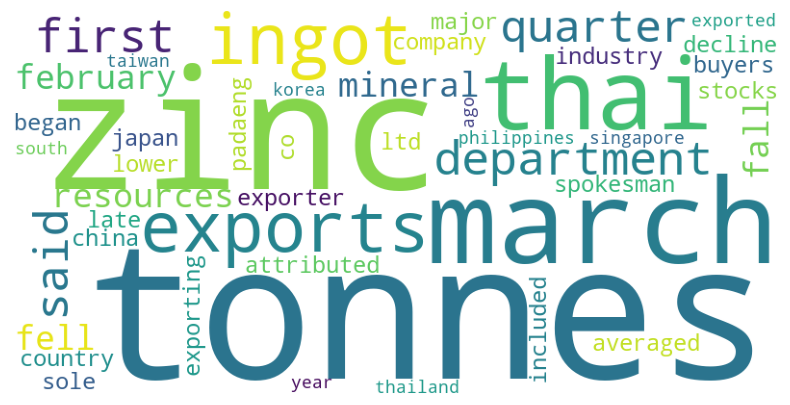

In [184]:
def preprocess():
    cats = all_cats()
    # print(cats)
    words = word_tokenize(cats[0])
    # print(words,flush=True)
    print(words)
    lowercase = [word.lower() for word in words if word.isalpha()]
    # print(lowercase,flush=True
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in lowercase if word not in stop_words]
    # print(filtered_words, flush=True)
    wc_text = ' '.join(filtered_words)
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(wc_text)
    wc = WordCloud(width=800,height=400,background_color='white').generate(wc_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis('off')
    
    return sentiment_scores
preprocess()

In [130]:
# lowercase = [word.lower() for word in words if word.isalpha()]
# print(lowercase,flush=True)

['thai', 'zinc', 'exports', 'fall', 'in', 'march', 'thai', 'zinc', 'ingot', 'exports', 'fell', 'to', 'tonnes', 'in', 'march', 'from', 'in', 'february', 'and', 'in', 'march', 'the', 'mineral', 'resources', 'department', 'said', 'a', 'spokesman', 'for', 'padaeng', 'industry', 'co', 'ltd', 'the', 'country', 'sole', 'exporter', 'attributed', 'the', 'decline', 'to', 'the', 'company', 'lower', 'stocks', 'which', 'averaged', 'tonnes', 'in', 'the', 'first', 'quarter', 'against', 'tonnes', 'in', 'late', 'when', 'it', 'began', 'exporting', 'the', 'department', 'said', 'major', 'buyers', 'included', 'china', 'japan', 'the', 'philippines', 'south', 'korea', 'singapore', 'and', 'taiwan', 'thailand', 'exported', 'tonnes', 'of', 'zinc', 'ingots', 'during', 'the', 'first', 'quarter', 'down', 'from', 'a', 'year', 'ago']


In [131]:
stop_words = set(stopwords.words('english'))

In [132]:
filtered_words = [word for word in lowercase if word not in stop_words]
print(filtered_words, flush=True)

['thai', 'zinc', 'exports', 'fall', 'march', 'thai', 'zinc', 'ingot', 'exports', 'fell', 'tonnes', 'march', 'february', 'march', 'mineral', 'resources', 'department', 'said', 'spokesman', 'padaeng', 'industry', 'co', 'ltd', 'country', 'sole', 'exporter', 'attributed', 'decline', 'company', 'lower', 'stocks', 'averaged', 'tonnes', 'first', 'quarter', 'tonnes', 'late', 'began', 'exporting', 'department', 'said', 'major', 'buyers', 'included', 'china', 'japan', 'philippines', 'south', 'korea', 'singapore', 'taiwan', 'thailand', 'exported', 'tonnes', 'zinc', 'ingots', 'first', 'quarter', 'year', 'ago']


In [133]:
wc_text = ' '.join(filtered_words)
wc_text

'thai zinc exports fall march thai zinc ingot exports fell tonnes march february march mineral resources department said spokesman padaeng industry co ltd country sole exporter attributed decline company lower stocks averaged tonnes first quarter tonnes late began exporting department said major buyers included china japan philippines south korea singapore taiwan thailand exported tonnes zinc ingots first quarter year ago'

In [141]:
sia = SentimentIntensityAnalyzer()

In [144]:
sentiment_scores = sia.polarity_scores(wc_text)
sentiment_scores

{'neg': 0.036, 'neu': 0.964, 'pos': 0.0, 'compound': -0.296}

In [ ]:
# 5

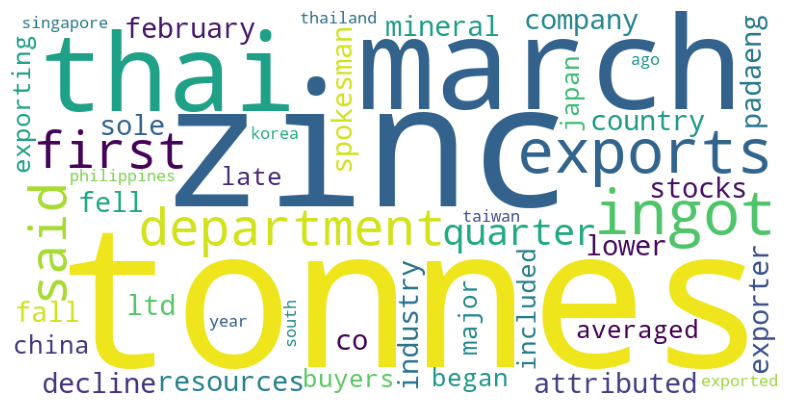

In [151]:
def visualize():
    wc = WordCloud(width=800,height=400,background_color='white').generate(wc_text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [156]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [166]:
cpu_news = reuters.fileids(categories='alum')

In [170]:
news = reuters.raw(fileids=cpu_news)
news

'SHOWA DENKO EXPORTS ALUMINIUM CASTING EQUIPMENT\n  &lt;Showa Denko Ltd> said it is exporting\n  aluminium billet casting equipment and technology to countries\n  that have recently begun aluminium smelting.\n      A company official said it won a 500 mln yen order to\n  deliver 10 sets of casting equipment to Venezuela\'s Venalum by\n  end-1987. He said it received an order for one set from\n  Aluminium Bahrain B.S.C. Last year and expects further orders\n  from the Bahrain smelter.\n      Showa Denko withdrew from smelting last year but expects to\n  increase its sales of equipment and technology, he said.\n  \n\nLME CLARIFIES NEW ALUMINIUM CONTRACT DETAILS\n  The London Metal Exchange (LME) has\n  issued a note clarifying details on its new high grade\n  aluminium contract, in response to questions from members\n  following the announcement of the contract, due to start June\n  1.\n   All deliverable shapes of aluminium under the high grade\n  primary aluminium contract (minimum 99.

In [ ]:
def sentiment():
    cats= reuters.categories()
    cat_map = {}
    cat_wordcloud = {}
    counter = 0
    for cat in cats:
        fileids = reuters.fileids(categories=[cat])
        texts = [reuters.raw(fileid) for fileid in fileids]
        combined_word = ' '.join(texts)
        tokenize_word = word_tokenize(combined_word)
        normalized_words =[word.lower() for word in tokenize_word if word.isalpha()]
        wc_words = ' '.join(normalized_words)
        sentiments = [sia.polarity_scores(text) for text in texts]
        # for each category find the average compound value
        if sentiments:
            avg = sum(score['compound'] for score in sentiments)/len(sentiments)
        else:
            avg = 0
        # map the avg category compound value to the category in cat_map
        cat_map[cat] = avg
        wc = WordCloud(width=800,height=400,background_color='white').generate(wc_words)
        cat_wordcloud[cat] = wc
        result = plt.imshow(cat_wordcloud[cat])
        
    return cat_map, cat_wordcloud
sentiment()